In [ ]:
# importing important libraries and packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  metrics, model_selection
from xgboost.sklearn import XGBClassifier


In [ ]:
insu = pd.DataFrame(pd.read_csv("/content/sample_data/train.csv"))
insu.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# converting all non-numerical values to numerical
insu['Gender'].replace('Female', 0,inplace=True)
insu['Gender'].replace('Male', 1,inplace=True)

insu['Vehicle_Damage'].replace('No', 0,inplace=True)
insu['Vehicle_Damage'].replace('Yes', 1,inplace=True)

insu['Vehicle_Age'].replace('< 1 Year', 0,inplace=True)
insu['Vehicle_Age'].replace('1-2 Year', 1,inplace=True)
insu['Vehicle_Age'].replace('> 2 Years', 2,inplace=True)

In [ ]:
insu.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


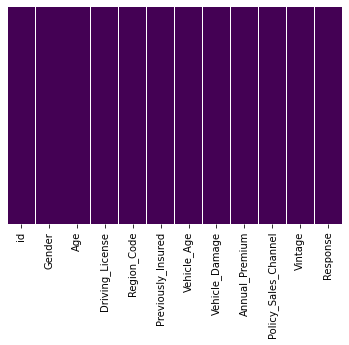

In [ ]:
# checking if there is any null values in the dataset
sns.heatmap(insu.isnull(),yticklabels=False,cbar=False,cmap='viridis')

luckily we don't have any null or missing values in our dataset :) 

In [ ]:
# normalizing the feature vectors
min = insu.min(axis=0)
max = insu.max(axis=0)
norm_features = (insu - min) / (max - min)

In [ ]:
norm_features

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.000000,1.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.070366,0.154321,0.716263,1.0
1,0.000003,1.0,0.861538,1.0,0.057692,0.0,0.5,0.0,0.057496,0.154321,0.598616,0.0
2,0.000005,1.0,0.415385,1.0,0.538462,0.0,1.0,1.0,0.066347,0.154321,0.058824,1.0
3,0.000008,1.0,0.015385,1.0,0.211538,1.0,0.0,0.0,0.048348,0.932099,0.667820,0.0
4,0.000010,0.0,0.138462,1.0,0.788462,1.0,0.0,0.0,0.046259,0.932099,0.100346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0.999990,1.0,0.830769,1.0,0.500000,1.0,0.5,0.0,0.051234,0.154321,0.269896,0.0
381105,0.999992,1.0,0.153846,1.0,0.711538,1.0,0.0,0.0,0.069551,0.932099,0.418685,0.0
381106,0.999995,1.0,0.015385,1.0,0.576923,1.0,0.0,0.0,0.060439,0.981481,0.522491,0.0
381107,0.999997,0.0,0.738462,1.0,0.269231,0.0,1.0,1.0,0.078110,0.759259,0.221453,0.0


In [ ]:
# taking a look at correlation matrix to remove any highly correlated feature 
# which can cause redundancy or make our model slower
norm_features.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,0.000878,-0.001507,0.003027,-0.002837,-0.000630,-0.001368
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,0.160427,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.000878,0.160427,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003027,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042


In [ ]:
norm_features.to_csv("/content/sample_data/train_processed.csv")
norm_features.corr().to_csv("/content/sample_data/correaltion_matrix.csv")

In [ ]:
# removing highly correlated features
norm_features = norm_features.drop('Vehicle_Age', axis =1)
norm_features = norm_features.drop('Previously_Insured', axis =1)

In [ ]:
#splitting train and test set in 75/25 ratio
trainX, testX, trainY, testY = train_test_split(insu.drop('Response',axis=1),insu['Response'], test_size=0.25,random_state=101)

In [ ]:
trainY = pd.DataFrame(trainY).to_numpy()

In [ ]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.05,
    'silent': True,
    'n_estimators': 5
}

model = XGBClassifier(**params).fit(trainX, trainY.ravel())

In [ ]:
y_pred = model.predict(testX)

In [ ]:
print(classification_report(testY, y_pred))
print("Accuracy:",metrics.accuracy_score(testY, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83703
           1       0.00      0.00      0.00     11575

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

Accuracy: 0.8784924116795063


In [ ]:
model.score(testX, testY)

0.8784924116795063

In [ ]:
rmse = mean_squared_error(y_pred, testY)
rmse

0.12150758832049371